##**Single Image Super-Resolution techniques**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Requrired Libraries
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import ToTensor, Normalize
from PIL import Image
import math
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torchvision.transforms as transforms
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.python.keras.layers import Add, Conv2D, Input, Lambda
from tensorflow.python.keras.models import Model


In [4]:
# low resolution images
img_low1 = plt.imread('/content/drive/MyDrive/IVP/Project/images/input/low_resolution_1.jpg')
img_low2 = plt.imread('/content/drive/MyDrive/IVP/Project/images/input/low_resolution_3.jpg')

Dimensions of image 1: (96, 96, 3)
Dimensions of image 2: (96, 96, 3)


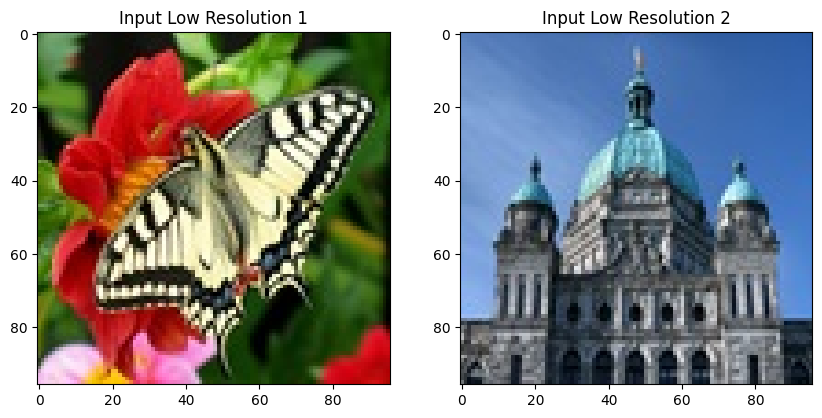

In [5]:
fix,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img_low1)
ax[0].set_title("Input Low Resolution 1")
ax[1].imshow(img_low2)
ax[1].set_title("Input Low Resolution 2")

print(f"Dimensions of image 1: {img_low1.shape}")
print(f"Dimensions of image 2: {img_low2.shape}")


## **For all the Techniques used, we are upscaling the given input image by a factor of 4.**





01. **Bicubic Interpolation**

In [6]:
# Set the scaling factor
scaling_factor =4

# Upscale the image using cubic interpolation
img_bicubic1 = cv2.resize(img_low1, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_CUBIC )
img_bicubic2 = cv2.resize(img_low2, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_CUBIC )


# Save the output image
cv2.imwrite('/content/drive/MyDrive/IVP/Project/images/Bicubic/OUTPUT_BICUBIC1.png', cv2.cvtColor(img_bicubic1, cv2.COLOR_RGB2BGR) )
cv2.imwrite('/content/drive/MyDrive/IVP/Project/images/Bicubic/OUTPUT_BICUBIC2.png', cv2.cvtColor(img_bicubic2, cv2.COLOR_RGB2BGR) )

True

Dimensions of image 1: (384, 384, 3)
Dimensions of image 2: (384, 384, 3)


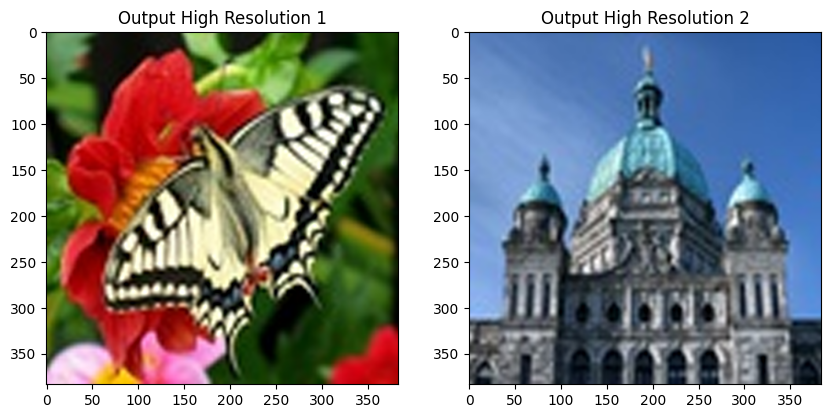

In [7]:
img_high1 = plt.imread('/content/drive/MyDrive/IVP/Project/images/Bicubic/OUTPUT_BICUBIC1.png')
img_high2 = plt.imread('/content/drive/MyDrive/IVP/Project/images/Bicubic/OUTPUT_BICUBIC2.png')

fix,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img_high1)
ax[0].set_title("Output High Resolution 1")
ax[1].imshow(img_high2)
ax[1].set_title("Output High Resolution 2")

print(f"Dimensions of image 1: {img_high1.shape}")
print(f"Dimensions of image 2: {img_high2.shape}")


02. **Bilinear Interpolation**

In [8]:
# Set the scaling factor
scaling_factor = 4

# Upscale the image using bilinear interpolation
img_bilinearc1 = cv2.resize(img_low1, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_LINEAR)
img_bilinear2 = cv2.resize(img_low2, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_LINEAR)


# Save the output image
cv2.imwrite('/content/drive/MyDrive/IVP/Project/images/Bilinear/OUTPUT_BILINEAR1.png',  cv2.cvtColor(img_bilinearc1, cv2.COLOR_RGB2BGR))
cv2.imwrite('/content/drive/MyDrive/IVP/Project/images/Bilinear/OUTPUT_BILINEAR2.png',  cv2.cvtColor(img_bilinear2, cv2.COLOR_RGB2BGR))

True

Dimensions of image 1: (384, 384, 3)
Dimensions of image 2: (384, 384, 3)


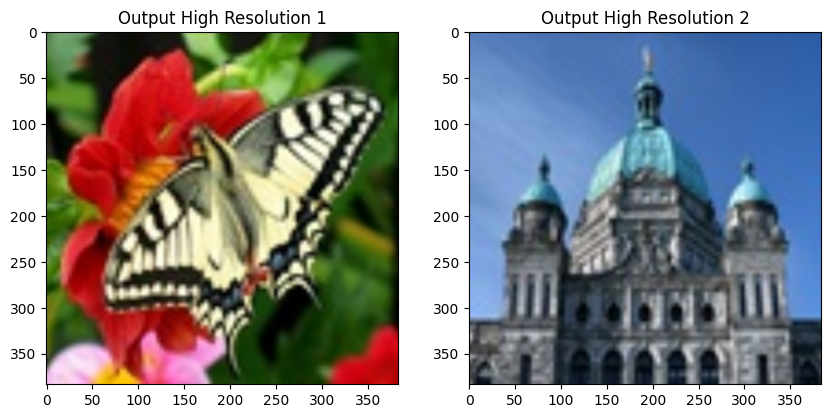

In [9]:
img_high1 = plt.imread('/content/drive/MyDrive/IVP/Project/images/Bilinear/OUTPUT_BILINEAR1.png')
img_high2 = plt.imread('/content/drive/MyDrive/IVP/Project/images/Bilinear/OUTPUT_BILINEAR2.png')

fix,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img_high1)
ax[0].set_title("Output High Resolution 1")
ax[1].imshow(img_high2)
ax[1].set_title("Output High Resolution 2")

print(f"Dimensions of image 1: {img_high1.shape}")
print(f"Dimensions of image 2: {img_high2.shape}")


3. **SRCNN**

Referenced github repositories For FSRCNN : https://github.com/yjn870/FSRCNN-pytorc



In [25]:
low_resolution_1 = plt.imread("/content/drive/MyDrive/IVP/Project/images/input/low_resolution_1.jpg")
low_resolution_2 = plt.imread("/content/drive/MyDrive/IVP/Project/images/input/low_resolution_3.jpg")

In [26]:
class FSRCNN(nn.Module):
    def __init__(self, scale_factor, num_channels=1, d=56, s=12, m=4):
        super(FSRCNN, self).__init__()
        self.first_part = nn.Sequential(
            nn.Conv2d(num_channels, d, kernel_size=5, padding=5//2),
            nn.PReLU(d)
        )
        self.mid_part = [nn.Conv2d(d, s, kernel_size=1), nn.PReLU(s)]
        for _ in range(m):
            self.mid_part.extend([nn.Conv2d(s, s, kernel_size=3, padding=3//2), nn.PReLU(s)])
        self.mid_part.extend([nn.Conv2d(s, d, kernel_size=1), nn.PReLU(d)])
        self.mid_part = nn.Sequential(*self.mid_part)
        self.last_part = nn.ConvTranspose2d(d, num_channels, kernel_size=9, stride=scale_factor, padding=9//2,
                                            output_padding=scale_factor-1)

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.first_part:
            if isinstance(m, nn.Conv2d):
                nn.init.normal_(m.weight.data, mean=0.0, std=math.sqrt(2/(m.out_channels*m.weight.data[0][0].numel())))
                nn.init.zeros_(m.bias.data)
        for m in self.mid_part:
            if isinstance(m, nn.Conv2d):
                nn.init.normal_(m.weight.data, mean=0.0, std=math.sqrt(2/(m.out_channels*m.weight.data[0][0].numel())))
                nn.init.zeros_(m.bias.data)
        nn.init.normal_(self.last_part.weight.data, mean=0.0, std=0.001)
        nn.init.zeros_(self.last_part.bias.data)

    def forward(self, x):
        x = self.first_part(x)
        x = self.mid_part(x)
        x = self.last_part(x)
        return x


In [27]:
model = FSRCNN(scale_factor=2)
model.load_state_dict(torch.load("/content/drive/MyDrive/IVP/Project/SRCNN/fsrcnn_x2.pth", map_location=torch.device('cpu')))

<All keys matched successfully>

In [28]:
tensor_image_1 = ToTensor()(low_resolution_1).unsqueeze(0)
tensor_image_2 = ToTensor()(low_resolution_2).unsqueeze(0)

For tensor_image_1

In [29]:
tensor_image_1_r = tensor_image_1[:,0,:,:]
tensor_image_1_g = tensor_image_1[:,1,:,:]
tensor_image_1_b = tensor_image_1[:,2,:,:]

tensor_image_1_r = tensor_image_1_r.reshape(1,1,96,96)
tensor_image_1_g = tensor_image_1_g.reshape(1,1,96,96)
tensor_image_1_b = tensor_image_1_b.reshape(1,1,96,96)


In [30]:
with torch.no_grad():
    output_tensor_r = model(tensor_image_1_r).clamp(0.0, 1.0)
    output_tensor_g = model(tensor_image_1_g).clamp(0.0, 1.0)
    output_tensor_b = model(tensor_image_1_b).clamp(0.0, 1.0)

In [31]:
r= output_tensor_r.reshape(1,192,192)
g = output_tensor_g.reshape(1,192,192)
b = output_tensor_b.reshape(1,192,192)

In [32]:
out = torch.stack((r,g,b))
out = out.reshape(3,192,192)

In [33]:
pil_image = transforms.ToPILImage()(out)
pil_image
tensor_image_1 = out.unsqueeze(0)
tensor_image_1_r = tensor_image_1[:,0,:,:]
tensor_image_1_g = tensor_image_1[:,1,:,:]
tensor_image_1_b = tensor_image_1[:,2,:,:]

tensor_image_1_r = tensor_image_1_r.reshape(1,1,192,192)
tensor_image_1_g = tensor_image_1_g.reshape(1,1,192,192)
tensor_image_1_b = tensor_image_1_b.reshape(1,1,192,192)

with torch.no_grad():
    output_tensor_r = model(tensor_image_1_r).clamp(0.0, 1.0)
    output_tensor_g = model(tensor_image_1_g).clamp(0.0, 1.0)
    output_tensor_b = model(tensor_image_1_b).clamp(0.0, 1.0)

In [34]:
r= output_tensor_r.reshape(1,384,384)
g = output_tensor_g.reshape(1,384,384)
b = output_tensor_b.reshape(1,384,384)

In [35]:
out = torch.stack((r,g,b))
out = out.reshape(3,384,384)

In [36]:
pil_image = transforms.ToPILImage()(out)
pil_image

pil_image.save("/content/drive/MyDrive/IVP/Project/images/SRCNN/high_resolution_1_FSRCNN.png")

For tensor_image_2

In [37]:
tensor_image_1_r = tensor_image_2[:,0,:,:]
tensor_image_1_g = tensor_image_2[:,1,:,:]
tensor_image_1_b = tensor_image_2[:,2,:,:]

tensor_image_1_r = tensor_image_1_r.reshape(1,1,96,96)
tensor_image_1_g = tensor_image_1_g.reshape(1,1,96,96)
tensor_image_1_b = tensor_image_1_b.reshape(1,1,96,96)

with torch.no_grad():
    output_tensor_r = model(tensor_image_1_r).clamp(0.0, 1.0)
    output_tensor_g = model(tensor_image_1_g).clamp(0.0, 1.0)
    output_tensor_b = model(tensor_image_1_b).clamp(0.0, 1.0)

r= output_tensor_r.reshape(1,192,192)
g = output_tensor_g.reshape(1,192,192)
b = output_tensor_b.reshape(1,192,192)

out = torch.stack((r,g,b))
out = out.reshape(3,192,192)

pil_image = transforms.ToPILImage()(out)
pil_image
tensor_image_1 = out.unsqueeze(0)
tensor_image_1_r = tensor_image_1[:,0,:,:]
tensor_image_1_g = tensor_image_1[:,1,:,:]
tensor_image_1_b = tensor_image_1[:,2,:,:]

tensor_image_1_r = tensor_image_1_r.reshape(1,1,192,192)
tensor_image_1_g = tensor_image_1_g.reshape(1,1,192,192)
tensor_image_1_b = tensor_image_1_b.reshape(1,1,192,192)

with torch.no_grad():
    output_tensor_r = model(tensor_image_1_r).clamp(0.0, 1.0)
    output_tensor_g = model(tensor_image_1_g).clamp(0.0, 1.0)
    output_tensor_b = model(tensor_image_1_b).clamp(0.0, 1.0)

r= output_tensor_r.reshape(1,384,384)
g = output_tensor_g.reshape(1,384,384)
b = output_tensor_b.reshape(1,384,384)

out = torch.stack((r,g,b))
out = out.reshape(3,384,384)

pil_image = transforms.ToPILImage()(out)
pil_image

pil_image.save("/content/drive/MyDrive/IVP/Project/images/SRCNN/high_resolution_2_FSRCNN.png")

Dimensions of image 1: (384, 384, 3)
Dimensions of image 2: (384, 384, 3)


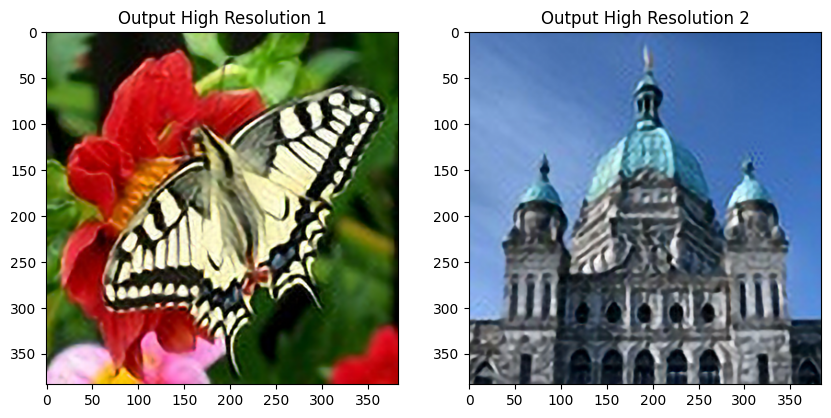

In [38]:
img_high1 = plt.imread('/content/drive/MyDrive/IVP/Project/images/SRCNN/high_resolution_1_FSRCNN.png')
img_high2 = plt.imread('/content/drive/MyDrive/IVP/Project/images/SRCNN/high_resolution_2_FSRCNN.png')

fix,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img_high1)
ax[0].set_title("Output High Resolution 1")
ax[1].imshow(img_high2)
ax[1].set_title("Output High Resolution 2")

print(f"Dimensions of image 1: {img_high1.shape}")
print(f"Dimensions of image 2: {img_high2.shape}")


4. **EDSR**
Referenced github repositories For EDSR : https://github.com/krasserm/super-resolution



In [39]:
DIV2K_RGB_MEAN = np.array([0.4488, 0.4371, 0.4040]) * 255


def resolve_single(model, lr):
    return resolve(model, tf.expand_dims(lr, axis=0))[0]

def resolve(model, lr_batch):
    lr_batch = tf.cast(lr_batch, tf.float32)
    sr_batch = model(lr_batch)
    sr_batch = tf.clip_by_value(sr_batch, 0, 255)
    sr_batch = tf.round(sr_batch)
    sr_batch = tf.cast(sr_batch, tf.uint8)
    return sr_batch

#  Normalization
def normalize(x, rgb_mean=DIV2K_RGB_MEAN):
    return (x - rgb_mean) / 127.5


def denormalize(x, rgb_mean=DIV2K_RGB_MEAN):
    return x * 127.5 + rgb_mean


def normalize_01(x):
    """Normalizes RGB images to [0, 1]."""
    return x / 255.0


def normalize_m11(x):
    """Normalizes RGB images to [-1, 1]."""
    return x / 127.5 - 1


def denormalize_m11(x):
    """Inverse of normalize_m11."""
    return (x + 1) * 127.5

def pixel_shuffle(scale):
    return lambda x: tf.nn.depth_to_space(x, scale)

In [40]:


def edsr(scale, num_filters=64, num_res_blocks=8, res_block_scaling=None):
    x_in = Input(shape=(None, None, 3))
    x = Lambda(normalize)(x_in)

    x = b = Conv2D(num_filters, 3, padding='same')(x)
    for i in range(num_res_blocks):
        b = res_block(b, num_filters, res_block_scaling)
    b = Conv2D(num_filters, 3, padding='same')(b)
    x = Add()([x, b])

    x = upsample(x, scale, num_filters)
    x = Conv2D(3, 3, padding='same')(x)

    x = Lambda(denormalize)(x)
    return Model(x_in, x, name="edsr")


def res_block(x_in, filters, scaling):
    x = Conv2D(filters, 3, padding='same', activation='relu')(x_in)
    x = Conv2D(filters, 3, padding='same')(x)
    if scaling:
        x = Lambda(lambda t: t * scaling)(x)
    x = Add()([x_in, x])
    return x


def upsample(x, scale, num_filters):
    def upsample_1(x, factor, **kwargs):
        x = Conv2D(num_filters * (factor ** 2), 3, padding='same', **kwargs)(x)
        return Lambda(pixel_shuffle(scale=factor))(x)

    if scale == 2:
        x = upsample_1(x, 2, name='conv2d_1_scale_2')
    elif scale == 3:
        x = upsample_1(x, 3, name='conv2d_1_scale_3')
    elif scale == 4:
        x = upsample_1(x, 2, name='conv2d_1_scale_2')
        x = upsample_1(x, 2, name='conv2d_2_scale_2')

    return x

In [41]:
model = edsr(scale=4, num_res_blocks=16)
model.load_weights('/content/drive/MyDrive/IVP/Project/EDSR/weights/edsr-16-x4/weights.h5')

In [42]:
sr1 = resolve_single(model, low_resolution_1)
sr2 = resolve_single(model, low_resolution_2)

In [43]:
sr1 = sr1.numpy()
sr2 = sr2.numpy()
pil_image_1 = Image.fromarray(sr1.astype('uint8'))
pil_image_2 = Image.fromarray(sr2.astype('uint8'))
pil_image_1.show()
pil_image_2.show()

In [44]:
pil_image_1.save("/content/drive/MyDrive/IVP/Project/images/EDSR/high_resolution_1_edsr.png")
pil_image_2.save("/content/drive/MyDrive/IVP/Project/images/EDSR/high_resolution_2_edsr.png")

Dimensions of image 1: (384, 384, 3)
Dimensions of image 2: (384, 384, 3)


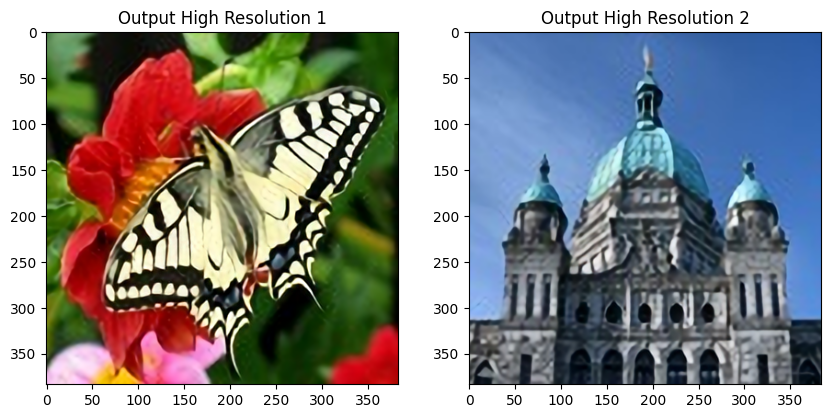

In [45]:
img_high1 = plt.imread('/content/drive/MyDrive/IVP/Project/images/EDSR/high_resolution_1_edsr.png')
img_high2 = plt.imread('/content/drive/MyDrive/IVP/Project/images/EDSR/high_resolution_2_edsr.png')

fix,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img_high1)
ax[0].set_title("Output High Resolution 1")
ax[1].imshow(img_high2)
ax[1].set_title("Output High Resolution 2")

print(f"Dimensions of image 1: {img_high1.shape}")
print(f"Dimensions of image 2: {img_high2.shape}")


**ESRGAN**

Referenced: https://github.com/xinntao/Real-ESRGAN

In [47]:
import os
from google.colab import files
import shutil

upload_folder = '/content/drive/MyDrive/IVP/Project/Real-ESRGAN/upload'
result_folder = '/content/drive/MyDrive/IVP/Project/Real-ESRGAN/results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving low_resolution_1.jpg to low_resolution_1.jpg
Saving low_resolution_3.jpg to low_resolution_3.jpg
move low_resolution_1.jpg to /content/drive/MyDrive/IVP/Project/Real-ESRGAN/upload/low_resolution_1.jpg
move low_resolution_3.jpg to /content/drive/MyDrive/IVP/Project/Real-ESRGAN/upload/low_resolution_3.jpg


In [49]:
# if it is out of memory, try to use the `--tile` option
# We upsample the image with the scale factor X3.5
!python /content/drive/MyDrive/IVP/Project/Real-ESRGAN/BasicSR-master/inference_realesrgan.py -n RealESRGAN_x4plus -i /content/drive/MyDrive/IVP/Project/Real-ESRGAN/upload -o /content/drive/MyDrive/IVP/Project/Real-ESRGAN/results --outscale 4 --face_enhance
# Arguments
# -n, --model_name: Model names
# -i, --input: input folder or image
# --outscale: Output scale, can be arbitrary scale factore.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /content/gfpgan/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:00<00:00, 232MB/s] 
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.2.2/parsing_parsenet.pth" to /content/gfpgan/weights/parsing_parsenet.pth

100% 81.4M/81.4M [00:00<00:00, 227MB/s]
Testing 0 low_resolution_1
Testing 1 low_resolution_3


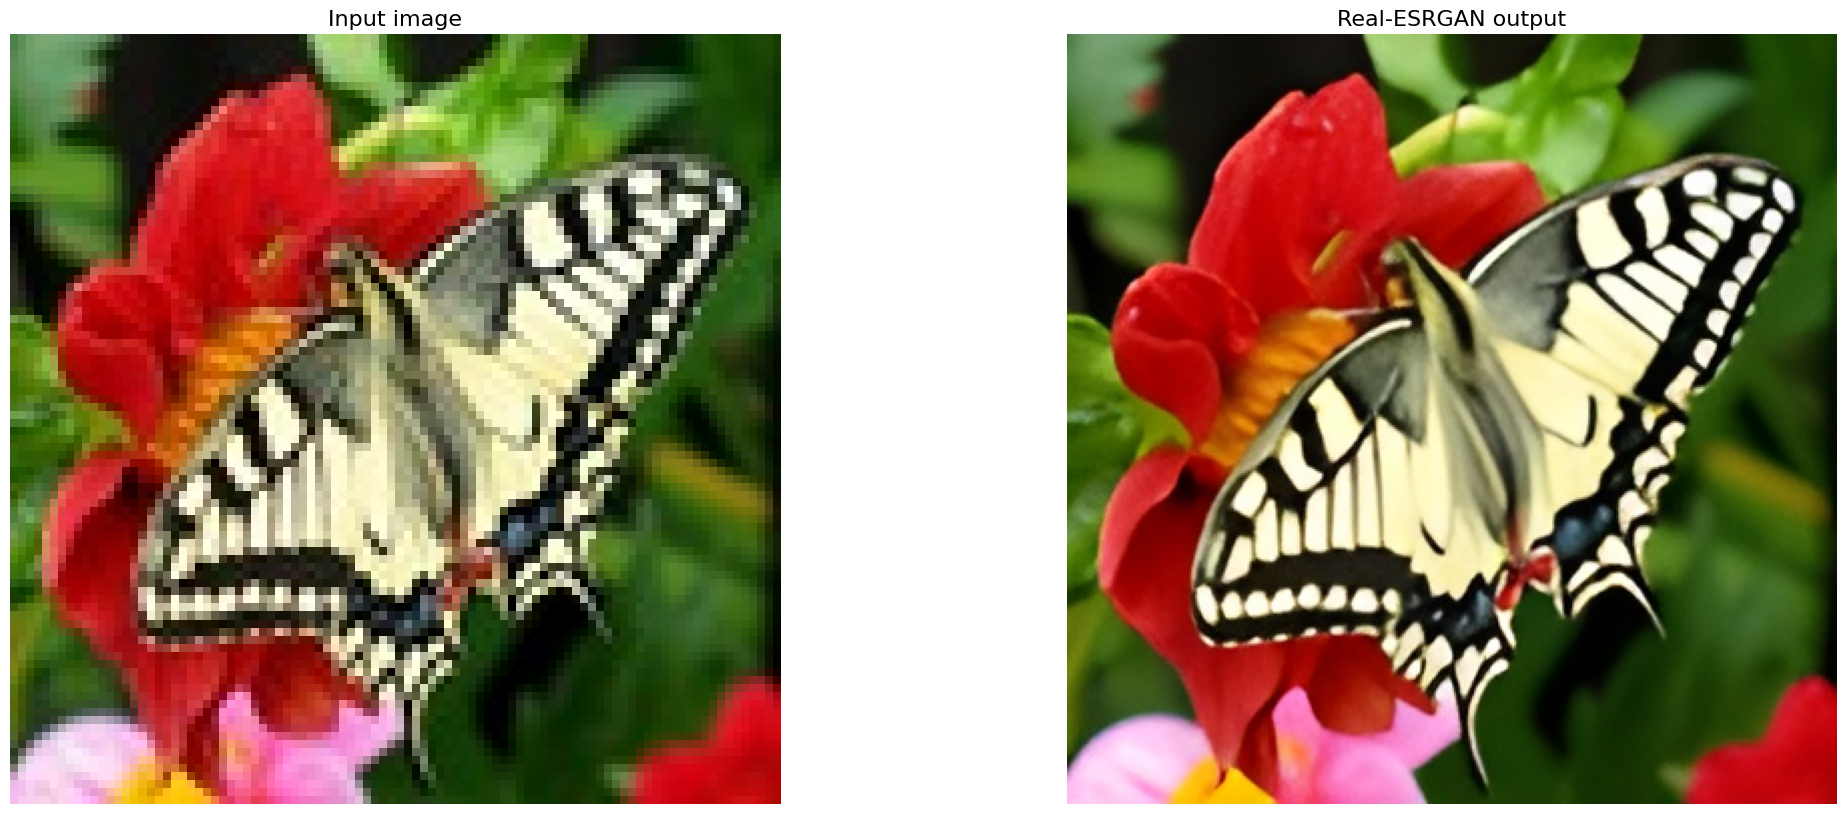

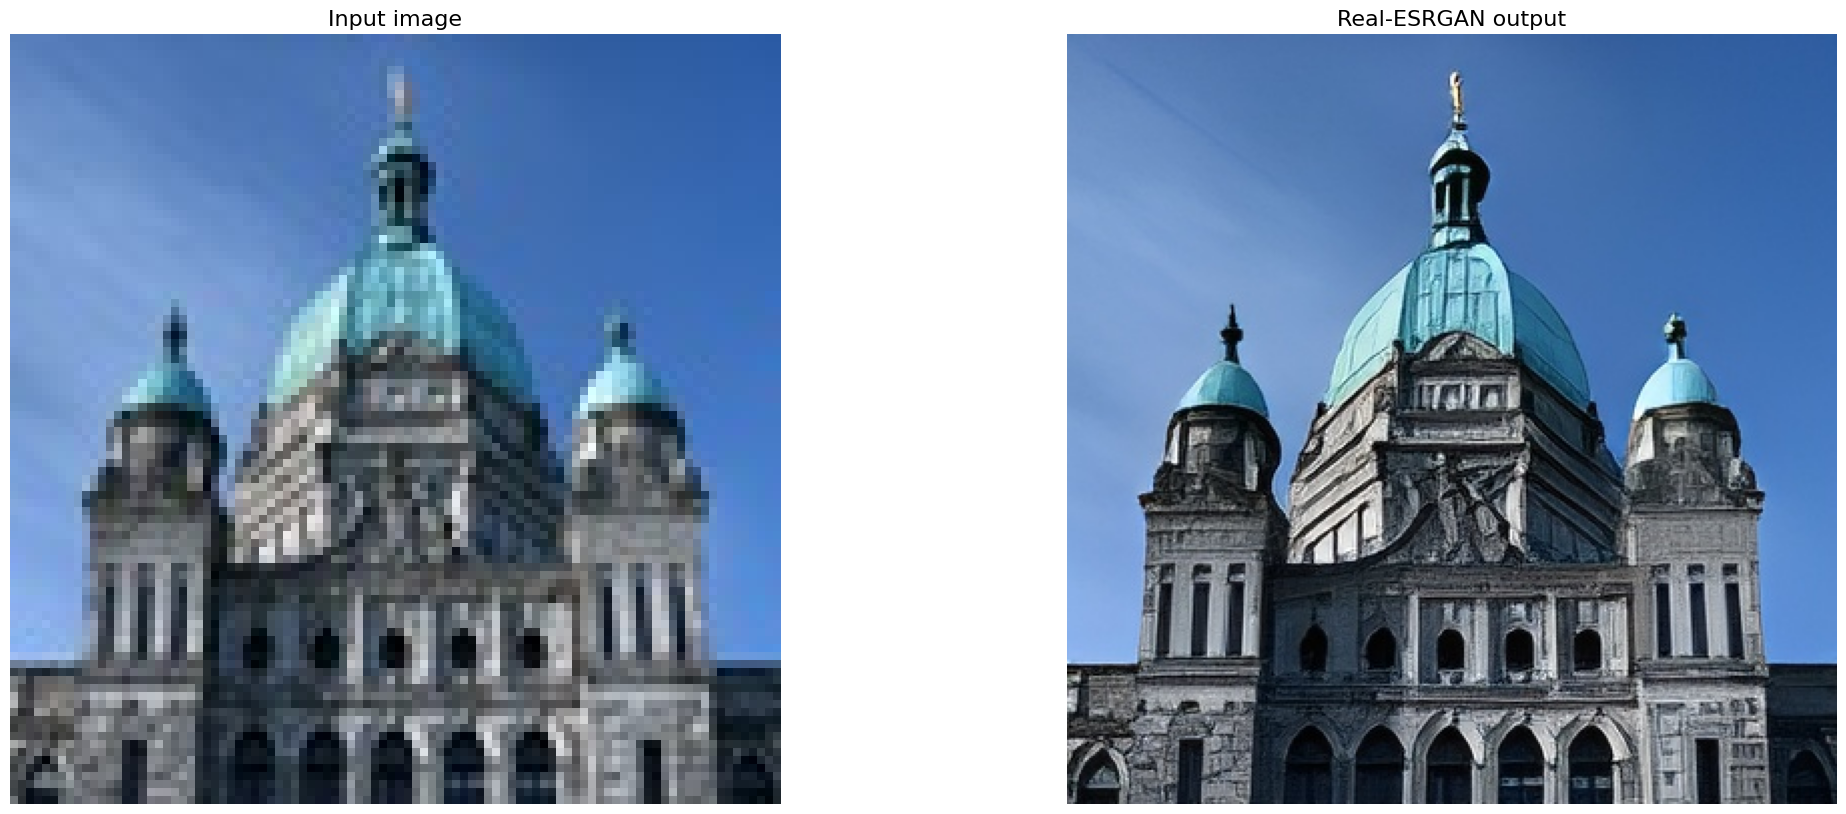

In [50]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = '/content/drive/MyDrive/IVP/Project/Real-ESRGAN/upload'
result_folder = '/content/drive/MyDrive/IVP/Project/Real-ESRGAN/results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

**SSIM index, PSNR - METRIC CALCULATIONS**

In [56]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage import io

# Load the ground truth high-resolution image and the super-resolved image
sr_img_low1 = io.imread('/content/drive/MyDrive/IVP/Project/Real-ESRGAN/results/low_resolution_1_out.jpg')
gt_img_low1 = io.imread('/content/drive/MyDrive/IVP/Project/images/HIGH/high_resolution_1.jpg')

sr_img_low2 = io.imread('/content/drive/MyDrive/IVP/Project/Real-ESRGAN/results/low_resolution_3_out.jpg')
gt_img_low2 = io.imread('/content/drive/MyDrive/IVP/Project/images/HIGH/high_resolution_3.jpg')
#print(sr_img_low2.shape)
#print(gt_img_low2.shape)
# Compute PSNR
psnr_value1 = psnr(gt_img_low1, sr_img_low1, data_range=sr_img_low1.max() - sr_img_low1.min())
psnr_value2 = psnr(gt_img_low2, sr_img_low2, data_range=sr_img_low2.max() - sr_img_low2.min())

# Compute SSIM
ssim_value1 = ssim(gt_img_low1, sr_img_low1, multichannel=True, data_range=sr_img_low1.max() - sr_img_low1.min())
ssim_value2 = ssim(gt_img_low2, sr_img_low2, multichannel=True, data_range=sr_img_low2.max() - sr_img_low2.min())


print(f"PSNR: {psnr_value1:.2f}, SSIM: {ssim_value1:.2f}")
print(f"PSNR: {psnr_value2:.2f}, SSIM: {ssim_value2:.2f}")



(384, 384, 3)
(384, 384, 3)
PSNR: 21.36, SSIM: 0.75
PSNR: 18.92, SSIM: 0.66


<ipython-input-56-3694a3db6a2c>:18: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value1 = ssim(gt_img_low1, sr_img_low1, multichannel=True, data_range=sr_img_low1.max() - sr_img_low1.min())
<ipython-input-56-3694a3db6a2c>:19: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value2 = ssim(gt_img_low2, sr_img_low2, multichannel=True, data_range=sr_img_low2.max() - sr_img_low2.min())


BICUBIC:

PSNR: 20.09, SSIM: 0.71
PSNR: 21.23, SSIM: 0.70


BILINEAR:

PSNR: 19.47, SSIM: 0.69
PSNR: 20.93, SSIM: 0.67


SRCNN:

PSNR: 21.48, SSIM: 0.73
PSNR: 21.50, SSIM: 0.72

EDSR:

PSNR: 22.35, SSIM: 0.77
PSNR: 21.67, SSIM: 0.74

ESRGAN:

PSNR: 21.36, SSIM: 0.75
PSNR: 18.92, SSIM: 0.66